## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [ ]:
dataset = pd.read_csv('spam.csv', encoding='latin-1')
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# remove last three columns
dataset = dataset.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
dataset

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Rename columns
dataset.columns = ['label', 'text']
dataset

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploratory Data Analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


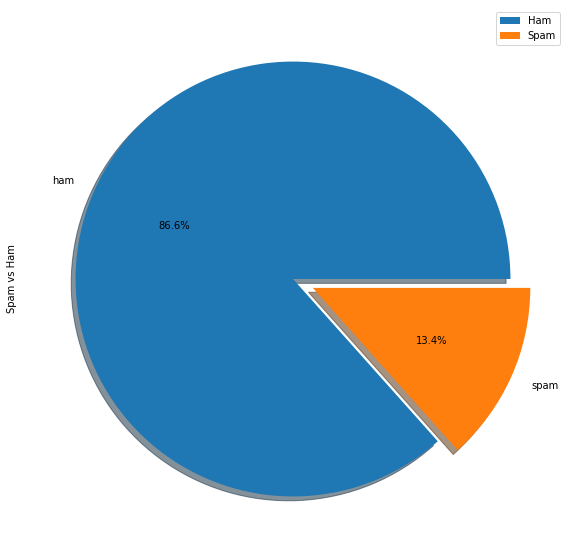

In [ ]:
dataset["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (10, 10), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

# Cleaning the texts

In [ ]:
import re
import nltk
# download and import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

# loop throgh dataset and clean text
for i in range(0, 1):
    print(dataset['text'][i])
    # removing text that are not words
    text = re.sub('[^a-zA-Z0-9]', ' ', dataset['text'][i])
    print(text)
    # convert texts to lowercase
    text = text.lower()
    print(text)
    # split each word in the text
    text = text.split()
    print(text)
    # apply stemming and remove stopwords
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    exclude = ['not', 'our', "we", "our", "you", "your", "yourself", "it",
               "what", "which", "who", "whom", "this", "that", "these", "those", "until", "while",                         "about", "against", "between", "through", "during", "before", "after", "above", "below",
               "from", "up", "down", "out", "on", "off", "over", "under", "again", "further", "then",
               "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
               "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same",
               "very", "will", "just", "should", "now"]
    for sw in exclude:
      if sw in all_stopwords:
        # if the words in the exclude list are in the stopword list, then remove them.
        all_stopwords.remove(sw)
    text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
    print(text)
    # separate the stem word with space
    text = ' '.join(text)
    print(text)
    corpus.append(text)
    print(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   
go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['go', 'until', 'jurong', 'point', 'crazi', 'avail', 'onli', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amor', 'wat']
go until jurong point crazi avail onli bugi n great world la e buffet cine there got amor wat
go until jurong point crazi avail onli bugi n great world la e buffet cine there got amor wat


In [ ]:
import re
import nltk
# download and import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

# loop throgh dataset and clean text
for i in range(0, 5572):
    # removing text that are not words
    text = re.sub('[^a-zA-Z0-9]', ' ', dataset['text'][i])
    # convert texts to lowercase
    text = text.lower()
    # split each word in the text
    text = text.split()
    # apply stemming and remove stopwords
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    exclude = ['not', 'our', "we", "our", "you", "your", "yourself", "it",
               "what", "which", "who", "whom", "this", "that", "these", "those", "until", "while",                         "about", "against", "between", "through", "during", "before", "after", "above", "below",
               "from", "up", "down", "out", "on", "off", "over", "under", "again", "further", "then",
               "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
               "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same",
               "very", "will", "just", "should", "now"]
    for sw in exclude:
      if sw in all_stopwords:
        # if the words in the exclude list are in the stopword list, then remove them.
        all_stopwords.remove(sw)
    text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
    # separate the stem word with space
    text = ' '.join(text)
    corpus.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

['go until jurong point crazi avail onli bugi n great world la e buffet cine there got amor wat', 'ok lar joke wif u oni', 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18', 'u dun say earli hor u c alreadi then say', 'nah think goe usf live around here though', 'freemsg hey there darl it 3 week now no word back like some fun you up it still tb ok xxx std chg send 1 50 rcv', 'even brother not like speak treat like aid patent', 'per your request mell mell oru minnaminungint nurungu vettam set your callertun all caller press 9 copi your friend callertun', 'winner valu network custom you select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour onli', 'your mobil 11 month more u r entitl updat latest colour mobil camera free call mobil updat co free on 08002986030', 'gonna home soon want talk about thi stuff anymor tonight k cri enough today', 'six chanc win cash from 100 20 0

In [ ]:
# pickle the corpus
import pickle
filename = 'corpus.sav'
pickle.dump(corpus, open(filename, 'wb'))

# Using Bag of Words Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
len(X[0])

7209

In [ ]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Clipping some unncessary words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7200)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 0].values

In [ ]:
# Label Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 1 ... 0 0 0]


In [ ]:
# Splitting Dataset into Training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Training with Naive Bayes ML Algorithm


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Create empty list for accuracy, precision, recall and f1-score of each ml algorithm
accuracy_score_bg = []
precision_score_bg = []
recall_score_bg = []
f1_score_bg = []
models = ['Naive Bayes', 'Logistic Regression', 'SVM linear', 'SVM rbf', 'SVM poly']

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac1 = accuracy_score(y_test, y_pred)
ps1 = precision_score(y_test, y_pred)
rs1 = recall_score(y_test, y_pred)
fs1 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_bg.append(ac1)
precision_score_bg.append(ps1)
recall_score_bg.append(rs1)
f1_score_bg.append(fs1)

# print result
print("Accuracy Score with Naive Bayes", ac1)
print("Precision Score with Naive Bayes", ps1)
print("Recall Score with Naive Bayes", rs1)
print("F1 Score with Naive Bayes", fs1)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[844 122]
 [ 17 132]]
Accuracy Score with Naive Bayes 0.8753363228699551
Precision Score with Naive Bayes 0.5196850393700787
Recall Score with Naive Bayes 0.8859060402684564
F1 Score with Naive Bayes 0.6550868486352357


## Training with the Logistic Regression ML Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_bg_lr = LogisticRegression(random_state = 0)
classifier_bg_lr.fit(X_train, y_train)

y_pred = classifier_bg_lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac2 = accuracy_score(y_test, y_pred)
ps2 = precision_score(y_test, y_pred)
rs2 = recall_score(y_test, y_pred)
fs2 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_bg.append(ac2)
precision_score_bg.append(ps2)
recall_score_bg.append(rs2)
f1_score_bg.append(fs2)

print("Accuracy Score with Logistic Regresion", ac2)
print("Precision Score with Logistic Regression", ps2)
print("Recall Score with Logistic Regression", rs2)
print("F1 Score with Logistic Regression", fs2)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[966   0]
 [ 23 126]]
Accuracy Score with Logistic Regresion 0.979372197309417
Precision Score with Logistic Regression 1.0
Recall Score with Logistic Regression 0.8456375838926175
F1 Score with Logistic Regression 0.9163636363636364


In [ ]:
accuracy_score_bg

[0.8753363228699551, 0.979372197309417]

## Training the SVM ML Algorithm

In [ ]:
# # SVM Kernels
from sklearn import svm
# for k in ('linear', 'poly', 'rbf', 'sigmoid'):
#     svmodel = svm.SVC(kernel=k)
#     svmodel.fit(X_train, y_train)
#     y_pred = svmodel.predict(X_train)
#     print(k)
#     print(accuracy_score(y_train, y_pred))

In [ ]:
svmodel_bg_lin = svm.SVC(kernel='linear')
svmodel_bg_lin.fit(X_train, y_train)

y_pred = svmodel_bg_lin.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac3 = accuracy_score(y_test, y_pred)
ps3 = precision_score(y_test, y_pred)
rs3 = recall_score(y_test, y_pred)
fs3 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_bg.append(ac3)
precision_score_bg.append(ps3)
recall_score_bg.append(rs3)
f1_score_bg.append(fs3)

print("Accuracy Score with SVM linear kernel", ac3)
print("Precision Score with SVM linear kernel", ps3)
print("Recall Score with SVM linear kernel", rs3)
print("F1 Score with SVM linear kernel", fs3)


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[966   0]
 [ 18 131]]
Accuracy Score with SVM linear kernel 0.9838565022421525
Precision Score with SVM linear kernel 1.0
Recall Score with SVM linear kernel 0.8791946308724832
F1 Score with SVM linear kernel 0.9357142857142857


In [ ]:
svmodel_bg_rbf = svm.SVC(kernel='rbf')
svmodel_bg_rbf.fit(X_train, y_train)

y_pred = svmodel_bg_rbf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac4 = accuracy_score(y_test, y_pred)
ps4 = precision_score(y_test, y_pred)
rs4 = recall_score(y_test, y_pred)
fs4 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_bg.append(ac4)
precision_score_bg.append(ps4)
recall_score_bg.append(rs4)
f1_score_bg.append(fs4)
print("Accuracy Score with SVM rbf kernel", ac4)
print("Precision Score with SVM rbf kernel", ps4)
print("Recall Score with SVM rbf kernel", rs4)
print("F1 Score with SVM rbf kernel", fs4)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[966   0]
 [ 24 125]]
Accuracy Score with SVM rbf kernel 0.97847533632287
Precision Score with SVM rbf kernel 1.0
Recall Score with SVM rbf kernel 0.8389261744966443
F1 Score with SVM rbf kernel 0.9124087591240876


In [ ]:
svmodel_bg_poly = svm.SVC(kernel='poly')
svmodel_bg_poly.fit(X_train, y_train)

y_pred = svmodel_bg_poly.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac5 = accuracy_score(y_test, y_pred)
ps5 = precision_score(y_test, y_pred)
rs5 = recall_score(y_test, y_pred)
fs5 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_bg.append(ac5)
precision_score_bg.append(ps5)
recall_score_bg.append(rs5)
f1_score_bg.append(fs5)
print("Accuracy Score with SVM poly kernel", ac5)
print("Precision Score with SVM poly kernel", ps5)
print("Recall Score with SVM poly kernel", rs5)
print("F1 Score with SVM poly kernel", fs5)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[965   1]
 [ 69  80]]
Accuracy Score with SVM poly kernel 0.9372197309417041
Precision Score with SVM poly kernel 0.9876543209876543
Recall Score with SVM poly kernel 0.5369127516778524
F1 Score with SVM poly kernel 0.6956521739130435


In [ ]:
print("accuracy score", accuracy_score_bg)
print("precision score", precision_score_bg)
print("recall score", recall_score_bg)
print("f1 score", f1_score_bg)
print(models)

accuracy score [0.8753363228699551, 0.979372197309417, 0.9838565022421525, 0.97847533632287, 0.9372197309417041]
precision score [0.5196850393700787, 1.0, 1.0, 1.0, 0.9876543209876543]
recall score [0.8859060402684564, 0.8456375838926175, 0.8791946308724832, 0.8389261744966443, 0.5369127516778524]
f1 score [0.6550868486352357, 0.9163636363636364, 0.9357142857142857, 0.9124087591240876, 0.6956521739130435]
['Naive Bayes', 'Logistic Regression', 'SVM linear', 'SVM rbf', 'SVM poly']


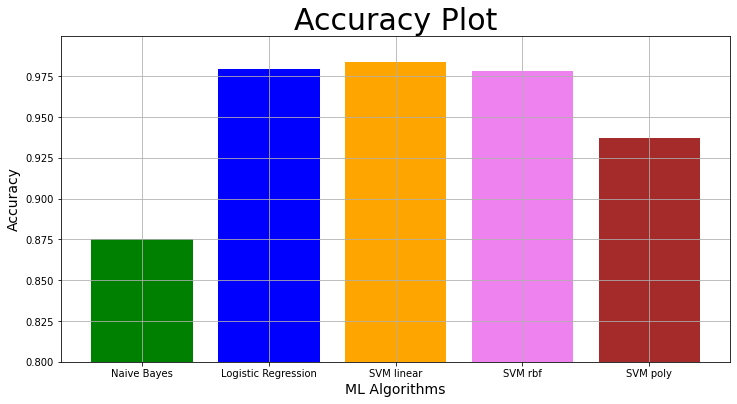

In [ ]:
# Accuracy Plot
plt.figure(figsize=(12,6))
colour = ['green', 'blue', 'orange', 'violet', 'brown']
ax = plt.gca()
plt.ylim(0.80000, 0.99999)
plt.bar(models, accuracy_score_bg, color=colour)
plt.title('Accuracy Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

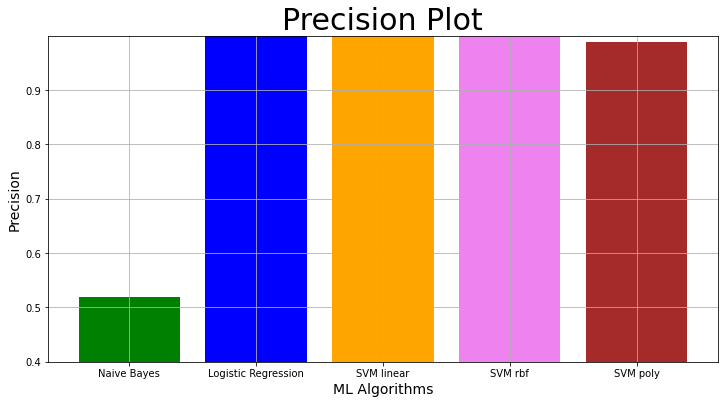

In [ ]:
# Precision Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0.40000, 0.99999)
plt.bar(models, precision_score_bg, color=colour)
plt.title('Precision Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

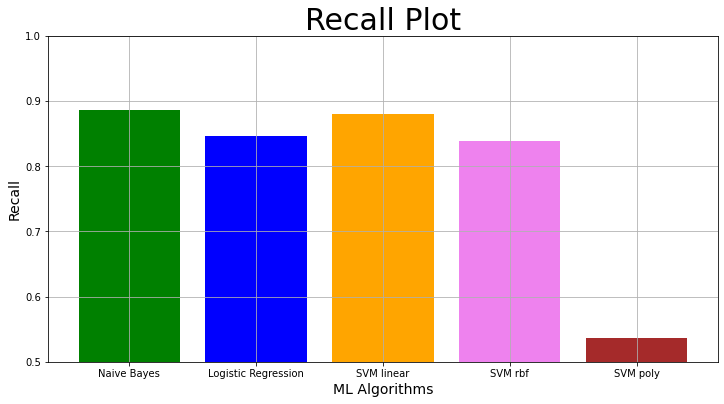

In [ ]:
# Recall Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0.50000, 1)
plt.bar(models, recall_score_bg, color=colour)
plt.title('Recall Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.grid(True)
plt.show()

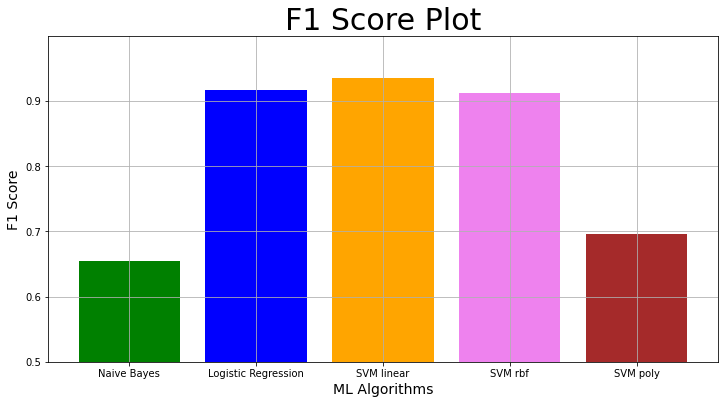

In [ ]:
# F1-Score Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0.50000, 0.99999)
plt.bar(models, f1_score_bg, color=colour)
plt.title('F1 Score Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.grid(True)
plt.show()

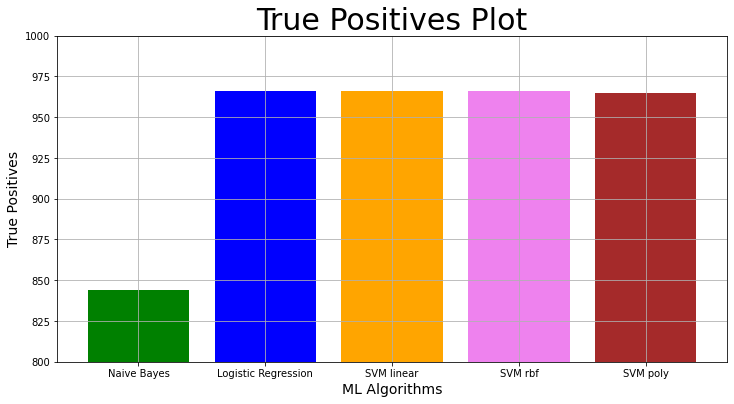

In [ ]:
# True Positives
tp = [844, 966, 966, 966, 965]
fp = [17, 23, 18, 24, 69]
tn = [132, 126, 131, 125, 80]
fn = [122, 0, 0, 0, 1]

plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(800, 1000)
plt.bar(models, tp, color=colour)
plt.title('True Positives Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('True Positives', fontsize=14)
plt.grid(True)
plt.show()

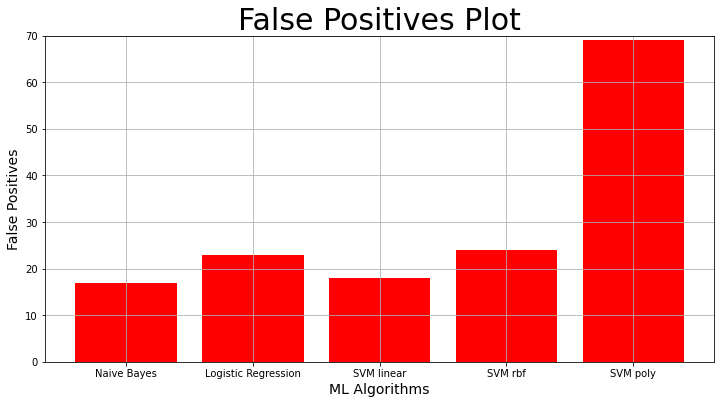

In [ ]:
# False Positives
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 70)
plt.bar(models, fp, color='red')
plt.title('False Positives Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('False Positives', fontsize=14)
plt.grid(True)
plt.show()

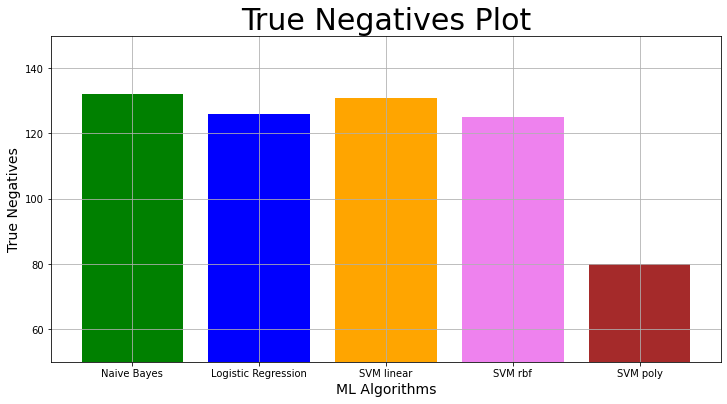

In [ ]:
# True Negatives
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(50, 150)
plt.bar(models, tn, color=colour)
plt.title('True Negatives Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('True Negatives', fontsize=14)
plt.grid(True)
plt.show()

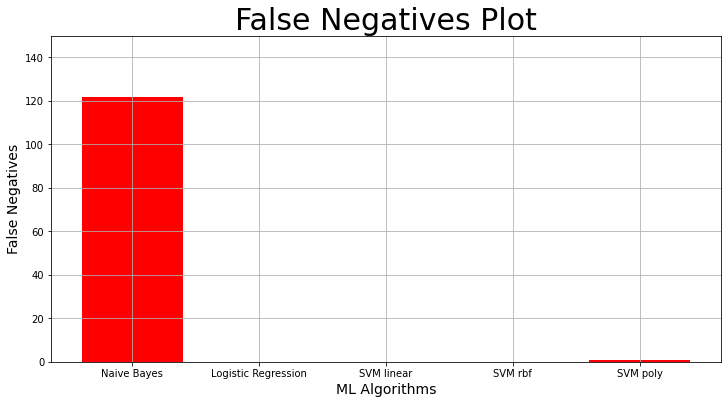

In [ ]:
# False Negatives
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 150)
plt.bar(models, fn, color='red')
plt.title('False Negatives Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('False Negatives', fontsize=14)
plt.grid(True)
plt.show()


# Using TF-IDF Model


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=7200)
X = tf.fit_transform(corpus).toarray()
print(X)

# splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Training the Naive Bayes ML Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_tf_nb = GaussianNB()
model_tf_nb.fit(X_train, y_train)

y_pred = model_tf_nb.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Create empty list for accuracy, precision, recall and f1-score of each ml algorithm
accuracy_score_tf = []
precision_score_tf = []
recall_score_tf = []
f1_score_tf = []

# Making the Confusion Matrix
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac1 = accuracy_score(y_test, y_pred)
ps1 = precision_score(y_test, y_pred)
rs1 = recall_score(y_test, y_pred)
fs1 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_tf.append(ac1)
precision_score_tf.append(ps1)
recall_score_tf.append(rs1)
f1_score_tf.append(fs1)

# print result
print("Accuracy Score with Naive Bayes", ac1)
print("Precision Score with Naive Bayes", ps1)
print("Recall Score with Naive Bayes", rs1)
print("F1 Score with Naive Bayes", fs1)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[843 123]
 [ 22 127]]
Accuracy Score with Naive Bayes 0.8699551569506726
Precision Score with Naive Bayes 0.508
Recall Score with Naive Bayes 0.8523489932885906
F1 Score with Naive Bayes 0.6365914786967419


## Training the Logistic Regression ML Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac2 = accuracy_score(y_test, y_pred)
ps2 = precision_score(y_test, y_pred)
rs2 = recall_score(y_test, y_pred)
fs2 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_tf.append(ac2)
precision_score_tf.append(ps2)
recall_score_tf.append(rs2)
f1_score_tf.append(fs2)

print("Accuracy Score with Logistic Regresion", ac2)
print("Precision Score with Logistic Regression", ps2)
print("Recall Score with Logistic Regression", rs2)
print("F1 Score with Logistic Regression", fs2)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[963   3]
 [ 49 100]]
Accuracy Score with Logistic Regresion 0.9533632286995516
Precision Score with Logistic Regression 0.970873786407767
Recall Score with Logistic Regression 0.6711409395973155
F1 Score with Logistic Regression 0.7936507936507937


## Training the SVM ML Algorithm

In [ ]:
# # SVM Kernels
# from sklearn import svm
# for k in ('linear', 'poly', 'rbf', 'sigmoid'):
#     svmodel = svm.SVC(kernel=k)
#     svmodel.fit(X_train, y_train)
#     y_pred = svmodel.predict(X_train)
#     print(k)
#     print(accuracy_score(y_train, y_pred))

In [ ]:
svmodel_tf_lr = svm.SVC(kernel='linear')
svmodel_tf_lr.fit(X_train, y_train)

y_pred = svmodel_tf_lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac3 = accuracy_score(y_test, y_pred)
ps3 = precision_score(y_test, y_pred)
rs3 = recall_score(y_test, y_pred)
fs3 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_tf.append(ac3)
precision_score_tf.append(ps3)
recall_score_tf.append(rs3)
f1_score_tf.append(fs3)

print("Accuracy Score with SVM linear kernel", ac3)
print("Precision Score with SVM linear kernel", ps3)
print("Recall Score with SVM linear kernel", rs3)
print("F1 Score with SVM linear kernel", fs3)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[960   6]
 [ 24 125]]
Accuracy Score with SVM linear kernel 0.9730941704035875
Precision Score with SVM linear kernel 0.9541984732824428
Recall Score with SVM linear kernel 0.8389261744966443
F1 Score with SVM linear kernel 0.8928571428571429


In [ ]:
svmodel_tf_rbf = svm.SVC(kernel='rbf')
svmodel_tf_rbf.fit(X_train, y_train)

y_pred = svmodel_tf_rbf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac4 = accuracy_score(y_test, y_pred)
ps4 = precision_score(y_test, y_pred)
rs4 = recall_score(y_test, y_pred)
fs4 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_tf.append(ac4)
precision_score_tf.append(ps4)
recall_score_tf.append(rs4)
f1_score_tf.append(fs4)
print("Accuracy Score with SVM rbf kernel", ac4)
print("Precision Score with SVM rbf kernel", ps4)
print("Recall Score with SVM rbf kernel", rs4)
print("F1 Score with SVM rbf kernel", fs4)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[964   2]
 [ 35 114]]
Accuracy Score with SVM rbf kernel 0.9668161434977578
Precision Score with SVM rbf kernel 0.9827586206896551
Recall Score with SVM rbf kernel 0.7651006711409396
F1 Score with SVM rbf kernel 0.860377358490566


In [ ]:
svmodel_tf_poly = svm.SVC(kernel='poly')
svmodel_tf_poly.fit(X_train, y_train)

y_pred = svmodel_tf_poly.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
print("================")
print(confusion_matrix(y_test, y_pred))
print("================")
ac5 = accuracy_score(y_test, y_pred)
ps5 = precision_score(y_test, y_pred)
rs5 = recall_score(y_test, y_pred)
fs5 = f1_score(y_test, y_pred)

# Add results to each list
accuracy_score_tf.append(ac5)
precision_score_tf.append(ps5)
recall_score_tf.append(rs5)
f1_score_tf.append(fs5)
print("Accuracy Score with SVM poly kernel", ac5)
print("Precision Score with SVM poly kernel", ps5)
print("Recall Score with SVM poly kernel", rs5)
print("F1 Score with SVM poly kernel", fs5)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[966   0]
 [ 85  64]]
Accuracy Score with SVM poly kernel 0.9237668161434978
Precision Score with SVM poly kernel 1.0
Recall Score with SVM poly kernel 0.42953020134228187
F1 Score with SVM poly kernel 0.6009389671361502


In [ ]:
print("accuracy score", accuracy_score_tf)
print("precision score", precision_score_tf)
print("recall score", recall_score_tf)
print("f1 score", f1_score_tf)
print(models)

accuracy score [0.8699551569506726, 0.9533632286995516, 0.9730941704035875, 0.9668161434977578, 0.9237668161434978]
precision score [0.508, 0.970873786407767, 0.9541984732824428, 0.9827586206896551, 1.0]
recall score [0.8523489932885906, 0.6711409395973155, 0.8389261744966443, 0.7651006711409396, 0.42953020134228187]
f1 score [0.6365914786967419, 0.7936507936507937, 0.8928571428571429, 0.860377358490566, 0.6009389671361502]
['Naive Bayes', 'Logistic Regression', 'SVM linear', 'SVM rbf', 'SVM poly']


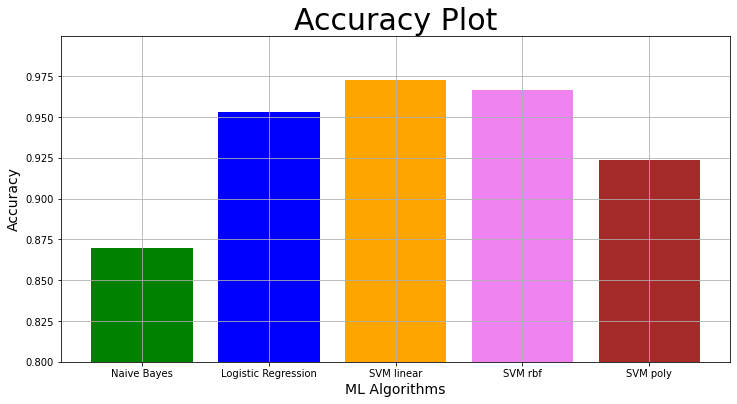

In [ ]:
# Accuracy Plot
plt.figure(figsize=(12,6))
colour = ['green', 'blue', 'orange', 'violet', 'brown']
ax = plt.gca()
plt.ylim(0.80000, 0.99999)
plt.bar(models, accuracy_score_tf, color=colour)
plt.title('Accuracy Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

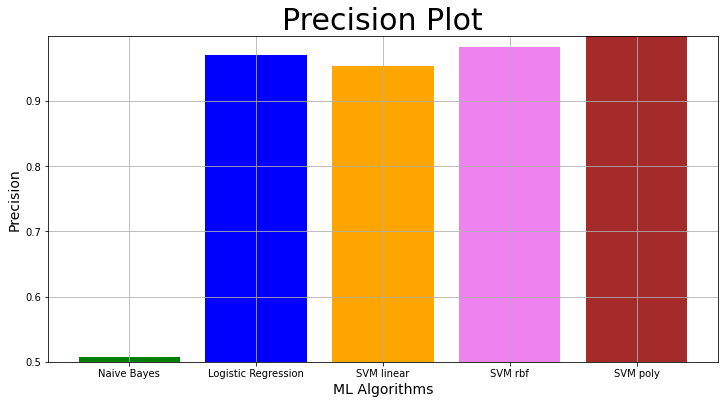

In [ ]:
# Precision Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0.50000, 0.99999)
plt.bar(models, precision_score_tf, color=colour)
plt.title('Precision Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

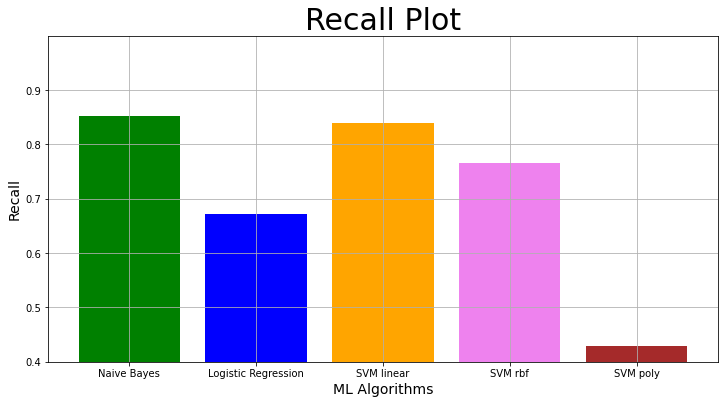

In [ ]:
# Recall Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0.40000, 0.99999)
plt.bar(models, recall_score_tf, color=colour)
plt.title('Recall Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.grid(True)
plt.show()

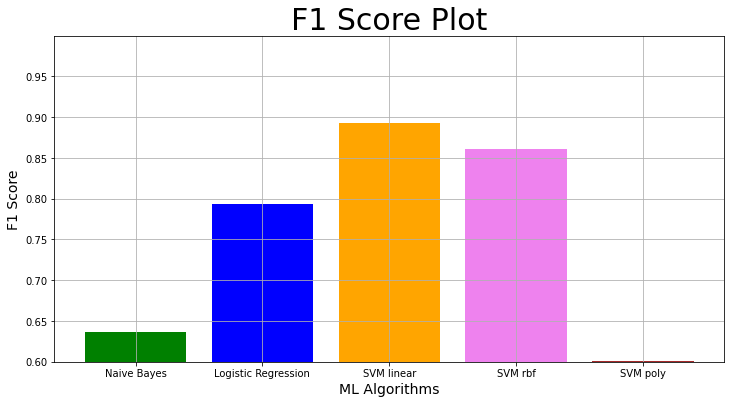

In [ ]:
# F1-Score Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0.60000, 0.99999)
plt.bar(models, f1_score_tf, color=colour)
plt.title('F1 Score Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.grid(True)
plt.show()

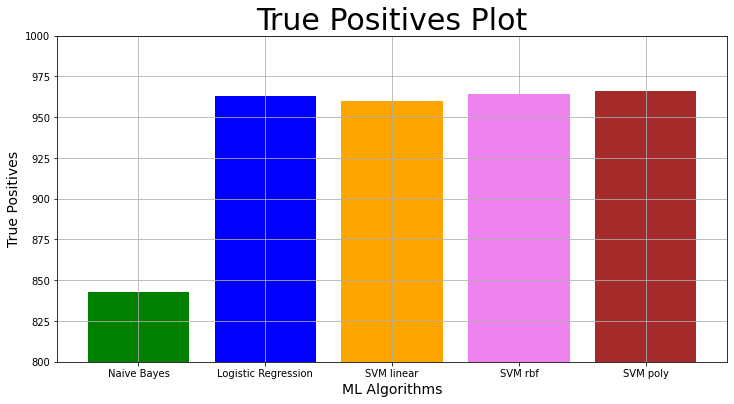

In [ ]:
# True Positives
tp = [843, 963, 960, 964, 966]
fp = [22, 49, 24, 35, 85]
tn = [127, 100, 125, 114, 64]
fn = [123, 3, 6, 2, 0]

plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(800, 1000)
plt.bar(models, tp, color=colour)
plt.title('True Positives Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('True Positives', fontsize=14)
plt.grid(True)
plt.show()

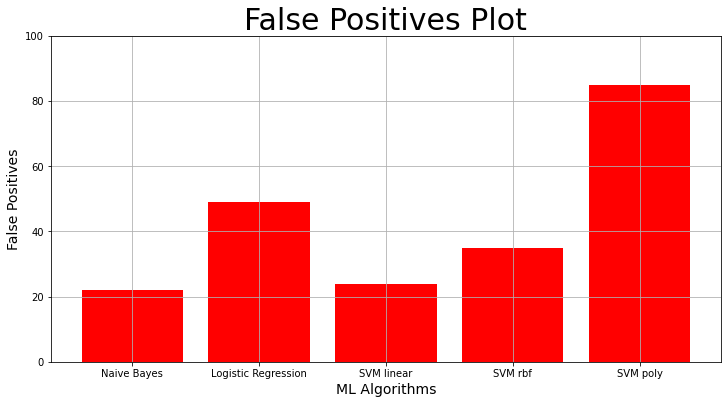

In [ ]:
# False Positives
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 100)
plt.bar(models, fp, color='red')
plt.title('False Positives Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('False Positives', fontsize=14)
plt.grid(True)
plt.show()

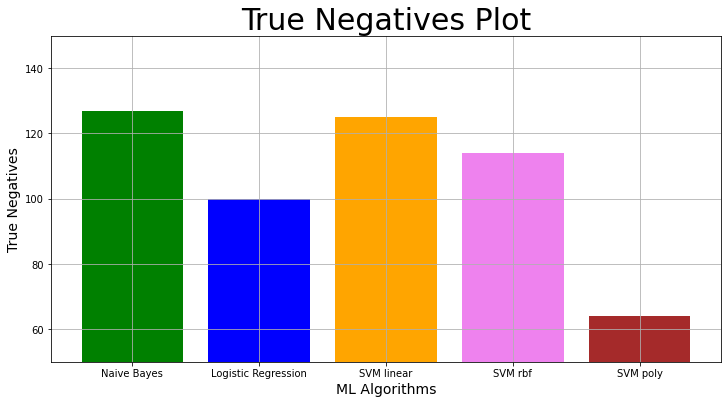

In [ ]:
# True Negatives
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(50, 150)
plt.bar(models, tn, color=colour)
plt.title('True Negatives Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('True Negatives', fontsize=14)
plt.grid(True)
plt.show()

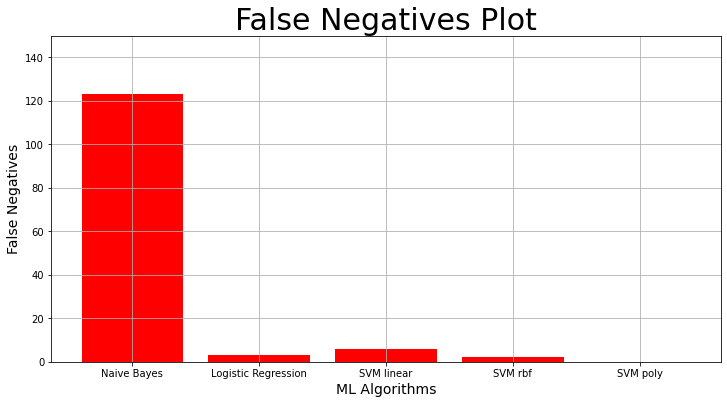

In [ ]:
# False Negatives
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 150)
plt.bar(models, fn, color='red')
plt.title('False Negatives Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('False Negatives', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# pickle model
filename = 'finalized_model.sav'
pickle.dump(svmodel_bg_lin, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8663677130044843


In [ ]:
new_text = 'I hate this restaurant so much'
           
  
new_text = re.sub('[^a-zA-Z0-9]', ' ', new_text)
new_text = new_text.lower()
new_text = new_text.split()
ps = PorterStemmer()
     
all_stopwords = stopwords.words('english')
exclude = ['not', 'our', "we", "our", "you", "your", "yourself", "it",
               "what", "which", "who", "whom", "this", "that", "these", "those", "until", "while",                         "about", "against", "between", "through", "during", "before", "after", "above", "below",
               "from", "up", "down", "out", "on", "off", "over", "under", "again", "further", "then",
               "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
               "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same",
               "very", "will", "just", "should", "now"]
for sw in exclude:
   if sw in all_stopwords:
   # if the words in the exclude list are in the stopword list, then remove them.
       all_stopwords.remove(sw)
        
new_text = [ps.stem(word) for word in new_text if not word in set(all_stopwords)]
new_text = ' '.join(new_text)
new_corpus = [new_text]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = loaded_model.predict(new_X_test)
print(new_y_pred)

return {'Result': new_y_pred}

ValueError: ignored